In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks
%cd city-data

/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/city-data


# **城镇居民人均收入**

In [31]:
import pandas as pd

df = pd.read_excel(r'城镇居民人均收入.xlsx', index_col=0)  # 读取需要转置的文件
df = df.T  # 转置
df.to_excel(r'towner_disposableIcome.xlsx')  # 另存为xlsx文件


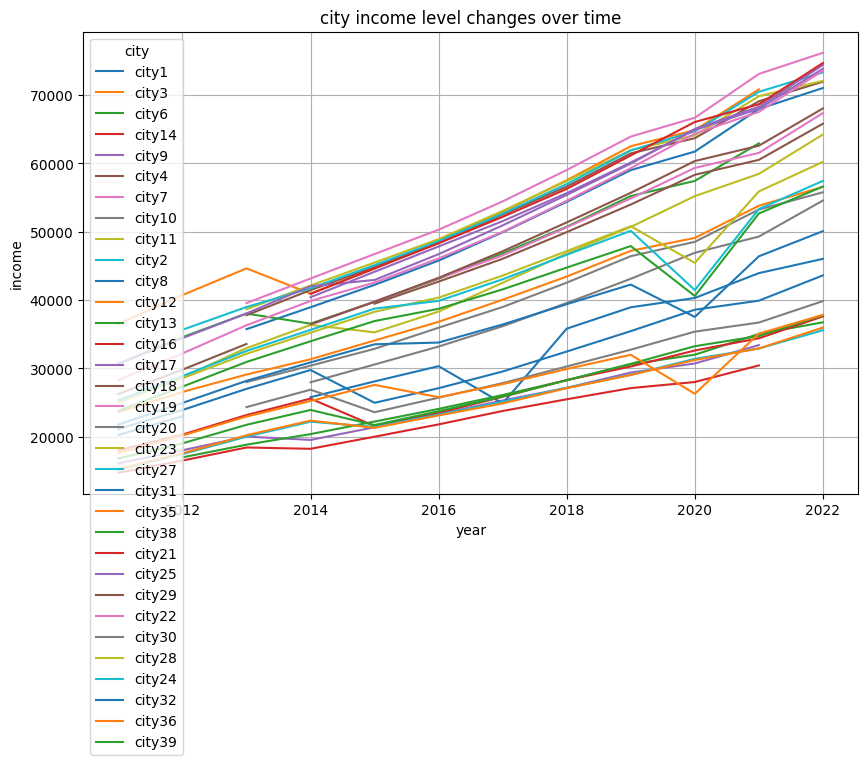

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'towner_disposableIcome.xlsx'
income_data = pd.read_excel(file_path)
income_data.iloc[:, 1:] = income_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


cities = income_data.columns[1:]
plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(income_data['income'], income_data[city], label=city)
plt.title('city income level changes over time')
plt.xlabel('year')
plt.ylabel('income')
plt.legend(title='city')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
file_path = 'towner_disposableIcome.xlsx'
income_data = pd.read_excel(file_path)

predicted_data = income_data.copy()

x_years = income_data.iloc[:, 0].values.reshape(-1, 1)

for col in income_data.columns[1:]:
    y = income_data[col].values
    nan_indices = np.where(pd.isnull(y))[0]
    if len(nan_indices) == len(y):
        continue

    x_known = np.delete(x_years, nan_indices, axis=0)
    y_known = np.delete(y, nan_indices)
    if len(y_known) < 2:
        continue

    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_known)

    model = LinearRegression()
    model.fit(x_poly, y_known)

    for idx in nan_indices:
        y[idx] = model.predict(poly.transform([[x_years[idx][0]]]))[0]

    predicted_data[col] = y

predicted_data.to_csv('cityincome_polynomial_predicted.csv', index=False)
print("使用多项式回归预测后的数据已保存到 'cityincome_polynomial_predicted.csv'")


使用多项式回归预测后的数据已保存到 'cityincome_polynomial_predicted.csv'


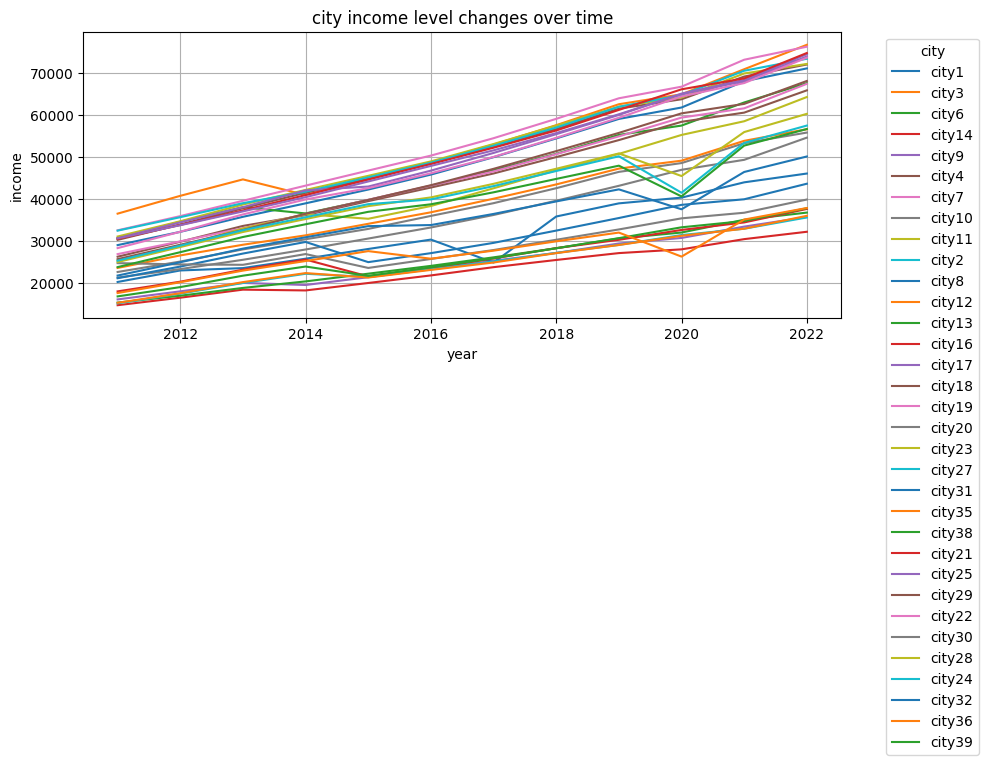

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_done = 'cityincome_polynomial_predicted.csv'
wage_data_done = pd.read_csv(file_path_done)

cities = wage_data_done.columns[1:]

plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(wage_data_done['income'], wage_data_done[city], label=city)
plt.title('city income level changes over time')
plt.xlabel('year')
plt.ylabel('income')
plt.legend(title='city', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# **农村居民人均收入**

In [33]:
import pandas as pd

df = pd.read_excel(r'农村居民人均收入.xlsx', index_col=0)  # 读取需要转置的文件
df = df.T  # 转置
df.to_excel(r'rural_disposableIcome.xlsx')  # 另存为xlsx文件

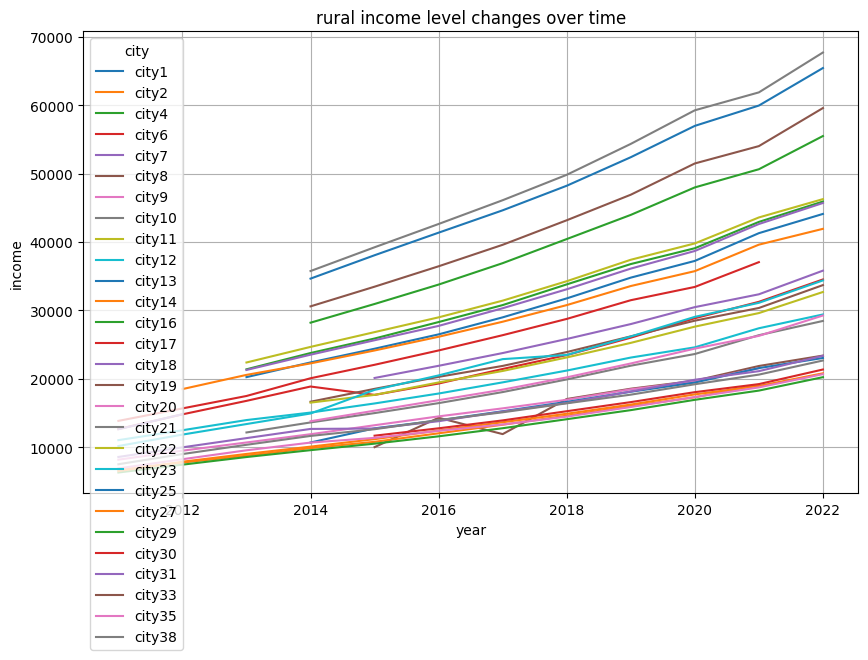

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'rural_disposableIcome.xlsx'
income_data = pd.read_excel(file_path)
income_data.iloc[:, 1:] = income_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


cities = income_data.columns[1:]
plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(income_data['income'], income_data[city], label=city)
plt.title('rural income level changes over time')
plt.xlabel('year')
plt.ylabel('income')
plt.legend(title='city')
plt.grid(True)
plt.show()


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
file_path = 'rural_disposableIcome.xlsx'
income_data = pd.read_excel(file_path)

predicted_data = income_data.copy()

x_years = income_data.iloc[:, 0].values.reshape(-1, 1)

for col in income_data.columns[1:]:
    y = income_data[col].values
    nan_indices = np.where(pd.isnull(y))[0]
    if len(nan_indices) == len(y):
        continue

    x_known = np.delete(x_years, nan_indices, axis=0)
    y_known = np.delete(y, nan_indices)
    if len(y_known) < 2:
        continue

    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_known)

    model = LinearRegression()
    model.fit(x_poly, y_known)

    for idx in nan_indices:
        y[idx] = model.predict(poly.transform([[x_years[idx][0]]]))[0]

    predicted_data[col] = y

predicted_data.to_csv('ruralincome_polynomial_predicted.csv', index=False)
print("使用多项式回归预测后的数据已保存到 'ruralincome_polynomial_predicted.csv'")


使用多项式回归预测后的数据已保存到 'ruralincome_polynomial_predicted.csv'


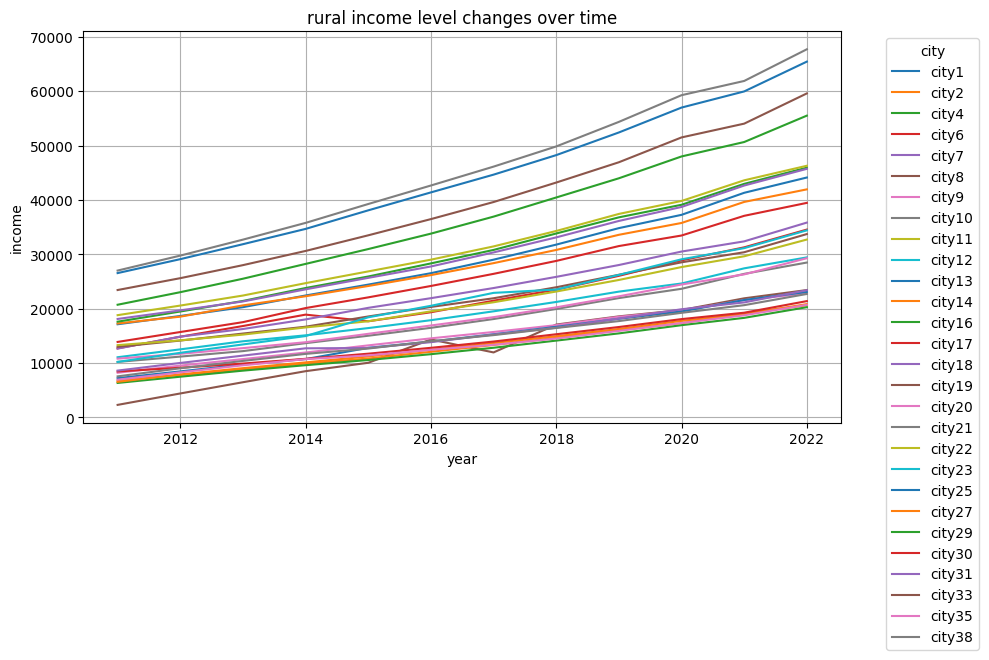

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_done = 'ruralincome_polynomial_predicted.csv'
wage_data_done = pd.read_csv(file_path_done)

cities = wage_data_done.columns[1:]

plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(wage_data_done['income'], wage_data_done[city], label=city)
plt.title('rural income level changes over time')
plt.xlabel('year')
plt.ylabel('income')
plt.legend(title='city', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
